# CNN FINAL

Epoch 1/10


C:\Users\Raviteja Nirati\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1011/1011 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.8279 - loss: 0.3617 - val_accuracy: 0.9398 - val_loss: 0.1538
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9691 - loss: 0.0862 - val_accuracy: 0.9468 - val_loss: 0.1410
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9886 - loss: 0.0336 - val_accuracy: 0.9291 - val_loss: 0.2535
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9946 - loss: 0.0165 - val_accuracy: 0.9377 - val_loss: 0.2356
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9976 - loss: 0.0075 - val_accuracy: 0.9413 - val_loss: 0.2655
Epoch 6/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9973 - loss: 0.0081 - val_accuracy: 0.9437 - val_loss: 0.2329
Epoch 7/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9969 - loss: 0.0088 - val_accuracy: 0.9440 - val_loss: 0.2765
Epoch 8/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9990 - loss: 0.00

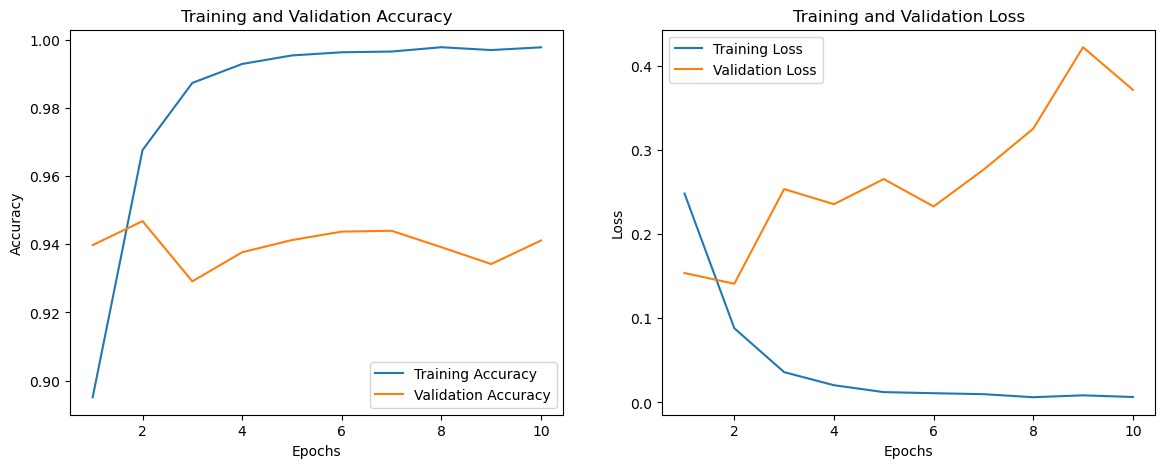

253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


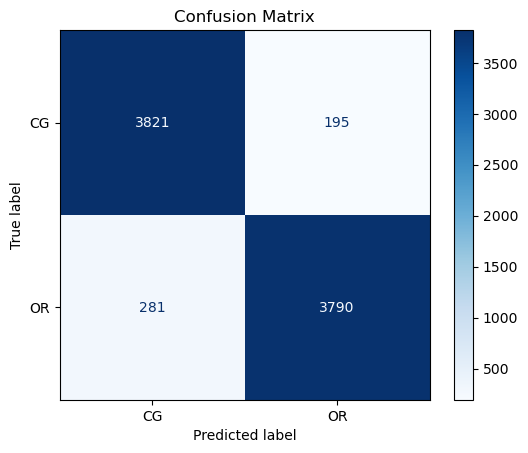

In [1]:
# Install required libraries if not installed
# !pip install tensorflow scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Load and preprocess the dataset
data_path =  r"D:\ShaluPersonal_DataSc\MSCDS_3Sem\project\FakeReviewDataset.csv"
df = pd.read_csv(data_path)

# Encode labels as integers
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split the data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)

# Pad the sequences
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post')
val_padded = pad_sequences(val_sequences, maxlen=max_len, padding='post')

# Convert labels to numpy arrays
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

# Define the CNN model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=50, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_padded, train_labels, epochs=10, batch_size=32, validation_data=(val_padded, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_padded, val_labels)
print(f'Validation Accuracy: {accuracy:.4f}')

# 1. Plot Accuracy and Loss Curves
def plot_accuracy_loss(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_accuracy_loss(history)

# 2. Confusion Matrix
def plot_confusion_matrix(model, val_padded, val_labels, label_encoder):
    predictions = model.predict(val_padded)
    y_pred = np.argmax(predictions, axis=1)
    cm = confusion_matrix(val_labels, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(model, val_padded, val_labels, label_encoder)













In [2]:
import pickle

# Save the model
model.save("cnn_fake_review_model.h5")

# Save the tokenizer and label encoder
with open("tokenizer_labelencoder.pkl", "wb") as f:
    pickle.dump({"tokenizer": tokenizer, "label_encoder": label_encoder}, f)

print("Model and preprocessing objects saved successfully!")


Model and preprocessing objects saved successfully!
